In [2]:
import csv
import pandas as pd

In [3]:
!pwd

/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/economíaFinanzas/dmeyf2023/zweite


In [18]:
# reads the csv file
df = pd.read_csv('../../normanbuck/exp/HT8230_20231013/BO_log.txt', sep='\t')

In [19]:
df.head()

,fecha,cols,rows,boosting,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,force_row_wise,...,skip_drop,extra_trees,seed,learning_rate,feature_fraction,num_leaves,min_data_in_leaf,estimulos,ganancia,iteracion_bayesiana
0,20231014 015318,508,104826,gbdt,binary,custom,True,True,False,True,...,0.5,True,274837,0.154518,0.455932,608,4113,9513,8.092954e+07,1
1,20231014 015400,508,104826,gbdt,binary,custom,True,True,False,True,...,0.5,True,274837,0.222788,0.538235,507,3201,9309,7.678553e+07,2
2,20231014 015459,508,104826,gbdt,binary,custom,True,True,False,True,...,0.5,True,274837,0.103571,0.526575,729,5840,9070,7.901559e+07,3
3,20231014 015538,508,104826,gbdt,binary,custom,True,True,False,True,...,0.5,True,274837,0.238877,0.360496,684,2822,9237,7.605870e+07,4
4,20231014 015620,508,104826,gbdt,binary,custom,True,True,False,True,...,0.5,True,274837,0.181332,0.621789,588,3883,10313,7.614463e+07,5


In [20]:
# last 5 rows and last 10 columns
df.iloc[-5:, -15:]

,neg_bagging_fraction,is_unbalance,scale_pos_weight,drop_rate,max_drop,skip_drop,extra_trees,seed,learning_rate,feature_fraction,num_leaves,min_data_in_leaf,estimulos,ganancia,iteracion_bayesiana
61,1,False,1,0.1,50,0.5,True,274837,0.287253,0.384994,571,2940,10598,7.558713e+07,62
62,1,False,1,0.1,50,0.5,True,274837,0.161411,0.584504,842,2702,8042,7.919899e+07,63
63,1,False,1,0.1,50,0.5,True,274837,0.223669,0.498039,829,4215,9571,7.899550e+07,64
64,1,False,1,0.1,50,0.5,True,274837,0.187414,0.409023,480,5999,10516,7.980491e+07,65
65,1,False,1,0.1,50,0.5,True,274837,0.155826,0.631055,576,2554,10188,7.721707e+07,66


In [21]:
df.iloc[-5:, df.columns.isin(['num_iterations', 'learning_rate', 'feature_fraction', 'min_data_in_leaf', 'num_leaves', 'ganancia'])]

,num_iterations,learning_rate,feature_fraction,num_leaves,min_data_in_leaf,ganancia
61,163,0.287253,0.384994,571,2940,7.558713e+07
62,249,0.161411,0.584504,842,2702,7.919899e+07
63,227,0.223669,0.498039,829,4215,7.899550e+07
64,657,0.187414,0.409023,480,5999,7.980491e+07
65,134,0.155826,0.631055,576,2554,7.721707e+07


In [28]:
# columns 'num_iterations', 'learning_rate', 'feature_fraction', 'min_data_in_leaf', 'num_leaves', 'ganancia'] when ganancias > 800000
df.loc[df['ganancia'] > 8E7, ['num_iterations', 'learning_rate', 'feature_fraction', 'min_data_in_leaf', 'num_leaves', 'estimulos', 'ganancia']]

,num_iterations,learning_rate,feature_fraction,min_data_in_leaf,num_leaves,estimulos,ganancia
0,321,0.154518,0.455932,4113,608,9513,8.092954e+07
10,227,0.129729,0.574612,3446,787,9154,8.024038e+07
24,411,0.104934,0.391852,2671,560,11037,8.041822e+07
39,262,0.112792,0.416595,2292,596,10487,8.012377e+07
49,512,0.117781,0.351834,3390,644,10238,8.326663e+07
55,344,0.157879,0.632147,2611,824,9690,8.010613e+07


<Axes: >

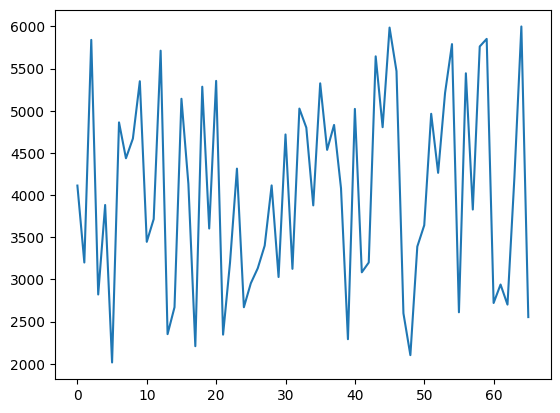

In [22]:
# plot num_iterations vs number of row in df
var = 'min_data_in_leaf'
df[var].plot(x=df.index, y= var, kind='line')  # 'line' for a line plot